In [20]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url = "http://lib.stat.cmu.edu/datasets/boston"

In [22]:
resp = requests.get(url)
resp.raise_for_status()
text = resp.text

from io import StringIO

raw_df = pd.read_csv(StringIO(text), sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT"
]
df = pd.DataFrame(data, columns=column_names)
df["MEDV"] = target

df.to_csv("boston_housing.csv", index=False)
print(df.head())

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KRish\AppData\Local\Temp\ipykernel_21892\2299705147.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(StringIO(text), sep="\s+", skiprows=22, header=None)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
df.isna().sum().sum()

np.int64(0)

In [26]:
df.shape

(506, 14)

In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Linear regression assumes a linear relationship between predictors and house prices, which is unrealistic for housing data. Random Forest was chosen to capture non-linear effects and feature interactions, while remaining robust to skewed distributions and outliers.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [31]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [32]:
cv_rmse = np.sqrt(-cv_scores)

print("CV RMSE scores:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())
print("Std CV RMSE:", cv_rmse.std())

CV RMSE scores: [3.5575914  4.82977747 3.81782905 3.26878568 3.712388  ]
Mean CV RMSE: 3.8372743188554077
Std CV RMSE: 0.5296110056045134


In [34]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = rf.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Test RMSE: 2.987748487400695
Test R²: 0.8782738236148319


In [ ]:
# hyperparametr tuning

In [36]:
depths = [None, 10, 8, 6, 4]

for d in depths:
    rf = RandomForestRegressor(n_estimators=300, max_depth=d, random_state=42, n_jobs=-1)
    
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    rmse = np.sqrt(-scores)
    print(f"max_depth={d}, CV RMSE mean={rmse.mean():.3f}, std={rmse.std():.3f}")


max_depth=None, CV RMSE mean=3.837, std=0.530
max_depth=10, CV RMSE mean=3.854, std=0.519
max_depth=8, CV RMSE mean=3.863, std=0.512
max_depth=6, CV RMSE mean=3.922, std=0.504
max_depth=4, CV RMSE mean=4.094, std=0.489


In [37]:
best_depth=8
leaves = [1, 3, 5, 10]

for leaf in leaves:
    rf = RandomForestRegressor(n_estimators=300, max_depth=best_depth, min_samples_leaf=leaf, random_state=42, n_jobs=-1)
    
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    rmse = np.sqrt(-scores)
    print(f"min_samples_leaf={leaf}, CV RMSE mean={rmse.mean():.3f}, std={rmse.std():.3f}")


min_samples_leaf=1, CV RMSE mean=3.863, std=0.512
min_samples_leaf=3, CV RMSE mean=3.960, std=0.595
min_samples_leaf=5, CV RMSE mean=4.069, std=0.617
min_samples_leaf=10, CV RMSE mean=4.180, std=0.566


In [38]:
BEST_LEAF = 1

features = ['sqrt', 0.4, 0.6, 0.8, 1.0]

for mf in features:
    rf = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf=1, max_features=mf, random_state=42, n_jobs=-1)
    
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    rmse = np.sqrt(-scores)
    print(f"max_features={mf}, CV RMSE mean={rmse.mean():.3f}, std={rmse.std():.3f}")

max_features=sqrt, CV RMSE mean=3.710, std=0.393
max_features=0.4, CV RMSE mean=3.633, std=0.371
max_features=0.6, CV RMSE mean=3.687, std=0.392
max_features=0.8, CV RMSE mean=3.815, std=0.532
max_features=1.0, CV RMSE mean=3.863, std=0.512


In [41]:
# final model fitting
rf_final = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf=1, max_features=0.4, random_state=42, n_jobs=-1)

In [42]:
rf_final.fit(X_train, y_train)

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_final, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

perm_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

perm_df

,feature,importance_mean,importance_std
12,LSTAT,32.823739,5.269052
5,RM,23.218189,1.932441
7,DIS,4.442760,0.746445
4,NOX,4.110216,0.817836
0,CRIM,2.650162,0.424451
10,PTRATIO,2.066058,0.388323
2,INDUS,0.966918,0.229505
9,TAX,0.829984,0.187290
6,AGE,0.724183,0.234567
11,B,0.268444,0.218816


In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf_final, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 8), cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

train_rmse_mean = train_rmse.mean(axis=1)
val_rmse_mean = val_rmse.mean(axis=1)

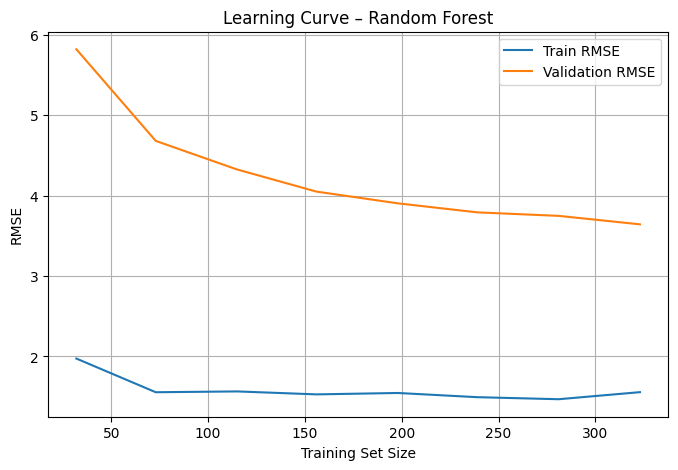

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_mean, label='Train RMSE')
plt.plot(train_sizes, val_rmse_mean, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve – Random Forest')
plt.legend()
plt.grid(True)
plt.show()